<a href="https://colab.research.google.com/github/kaztyel/Week2/blob/main/Week2_Assignament.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importation of the required libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Importation of the datasets
cabdata = pd.read_csv('https://raw.githubusercontent.com/kaztyel/Week2/main/Cab_Data.csv')
citydata = pd.read_csv("https://raw.githubusercontent.com/kaztyel/Week2/main/City.csv")
customerdata = pd.read_csv("https://raw.githubusercontent.com/kaztyel/Week2/main/Customer_ID.csv")
transactiondata = pd.read_csv("https://raw.githubusercontent.com/kaztyel/Week2/main/Transaction_ID.csv")

### Exploration of the Data

In [4]:
cabdata.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [5]:
citydata.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [6]:
customerdata.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [7]:
transactiondata.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [8]:
cabdata.shape

(359392, 7)

In [9]:
citydata.shape

(20, 3)

In [10]:
customerdata.shape

(49171, 4)

In [11]:
transactiondata.shape

(440098, 3)

In [12]:
cabdata.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [13]:
#Convesion of the Date information to Date format
cabdata['Converted_date'] = pd.TimedeltaIndex(cabdata['Date of Travel'], unit='d') + dt.datetime(1900,1,1)
cabdata.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05


In [14]:
citydata.dtypes

City          object
Population    object
Users         object
dtype: object

In [15]:
citydata

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [16]:
#Conversion of Population and Users information to numeric data
citydata['Population'] = citydata['Population'].str.replace(",", "").astype(int)
citydata['Users'] = citydata['Users'].str.replace(",", "").astype(int)

In [17]:
citydata

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [18]:
citydata.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [19]:
customerdata.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [20]:
customerdata.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [21]:
transactiondata.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [22]:
transactiondata.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [23]:
cabdata.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [24]:
customerdata.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [25]:
transactiondata.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


## Transformation of the Data

In [26]:
mergedata = pd.merge(transactiondata, cabdata, on=['Transaction ID'])

In [27]:
mergedata.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05


In [28]:
masterdata = pd.merge(mergedata, customerdata, on=['Customer ID'])

In [29]:
masterdata.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,Male,27,9237


In [30]:
#Search of null values
def missing_data(data):
  total = data.isnull().sum()
  percent = (data.isnull().sum()/data.isnull().count()*100)
  tt = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
  types = []
  for col in data.columns:
    dtype = str(data[col].dtype)
    types.append(dtype)
  tt['Types'] = types
  return(np.transpose(tt))

In [31]:
missing_data(masterdata)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date,Gender,Age,Income (USD/Month)
Total,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,object,int64,object,object,float64,float64,float64,datetime64[ns],object,int64,int64


In [32]:
#Search and elimination of duplicates
masterdata.drop_duplicates()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,2018-01-09,Female,42,19417
359388,10439799,12490,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,2018-01-05,Male,33,18713
359389,10439838,41414,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,2018-01-06,Male,38,3960
359390,10439840,41677,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,2018-01-08,Male,23,19454


In [33]:
masterdata.drop('Date of Travel', axis=1, inplace=True)

In [34]:
masterdata.head()

,Transaction ID,Customer ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,Male,28,10813
1,10351127,29290,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,Male,28,10813
2,10412921,29290,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,Male,28,10813
3,10000012,27703,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,Male,27,9237
4,10320494,27703,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,Male,27,9237


In [35]:
#Determination of the margin per transaction
masterdata["Transaction Margin"] = masterdata["Price Charged"]-masterdata["Cost of Trip"]
masterdata.head()

,Transaction ID,Customer ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date,Gender,Age,Income (USD/Month),Transaction Margin
0,10000011,29290,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,Male,28,10813,57.3150
1,10351127,29290,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,Male,28,10813,281.2772
2,10412921,29290,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,Male,28,10813,194.6480
3,10000012,27703,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,Male,27,9237,23.6660
4,10320494,27703,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,Male,27,9237,253.9808


## Analysis of Data

Text(0.5, 1.0, 'Clustermap')

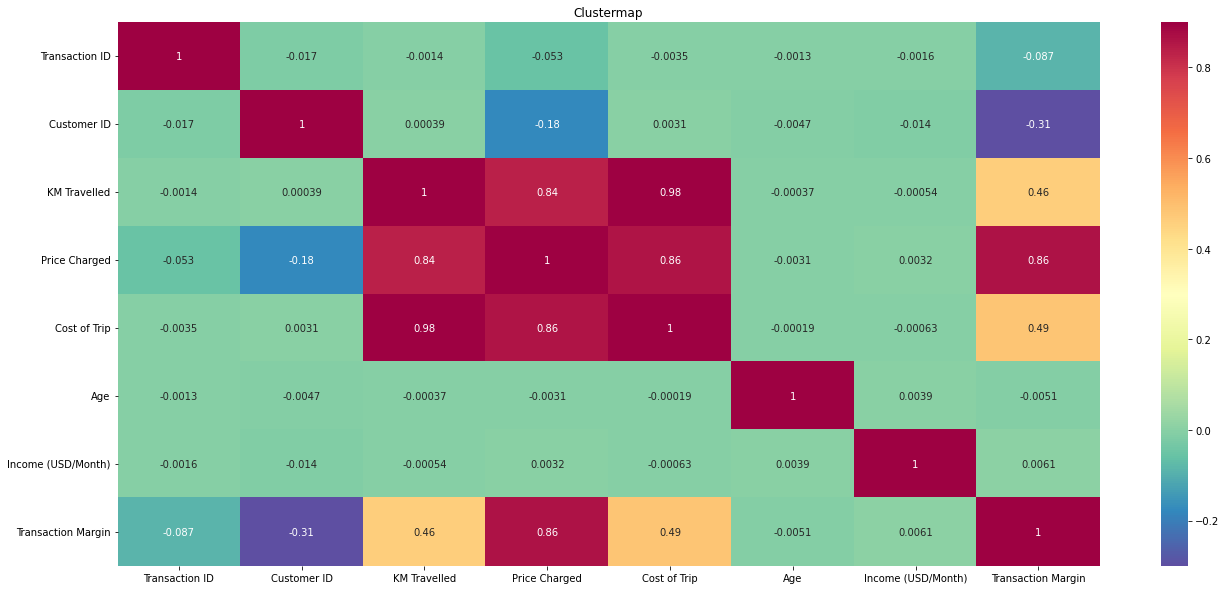

In [36]:
#Correlation between numeric variables
corrs = masterdata.corr()
plt.figure(figsize=(22,10))
#Mapa de calor de correlaciones
sns.heatmap(corrs, cmap=plt.cm.Spectral_r, vmin=-0.30, annot= True, vmax=0.9)
plt.title("Clustermap")

In [37]:
masterdata.head()

,Transaction ID,Customer ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date,Gender,Age,Income (USD/Month),Transaction Margin
0,10000011,29290,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-10,Male,28,10813,57.3150
1,10351127,29290,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-23,Male,28,10813,281.2772
2,10412921,29290,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-25,Male,28,10813,194.6480
3,10000012,27703,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-08,Male,27,9237,23.6660
4,10320494,27703,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-23,Male,27,9237,253.9808


**Hypothesis #1: The Yellow Cab Company got the largest margins** 

In [38]:
#Determination of total accumulated margins per company
companymargin = masterdata.filter(items=['Company', 'Transaction Margin']).groupby(['Company']).sum()
companymargin

,Transaction Margin
Company,
Pink Cab,5.307328e+06
Yellow Cab,4.402037e+07


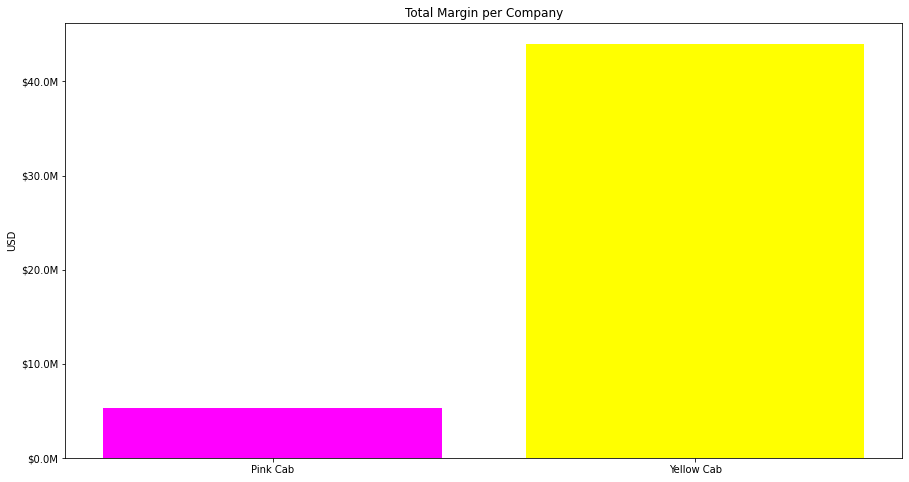

In [39]:
#Which company has bigger transaction margins in total?

from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import figure


x = np.arange(2)
plotmargin = companymargin['Transaction Margin']


def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
colors1 = ['magenta', 'yellow']
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, plotmargin,color= colors1)
plt.xticks(x, ('Pink Cab', 'Yellow Cab'))
plt.title("Total Margin per Company")
plt.ylabel('USD')
fig = plt.gcf()
fig.set_size_inches(15, 8)
fig.savefig('test2png.png', dpi=100)
plt.show()


The data shows that the Yellow Cab company has the largest margins, by far.

**Hypothesis 2: Does the margin per transaction differ among cities?**

In [40]:
citymeanmargin = masterdata.filter(items=['City', 'Transaction Margin']).groupby(['City']).mean()
citymeanmargin.reset_index()


,City,Transaction Margin
0,ATLANTA GA,111.477158
1,AUSTIN TX,107.577824
2,BOSTON MA,59.568883
3,CHICAGO IL,59.820104
4,DALLAS TX,160.856957
5,DENVER CO,103.943793
6,LOS ANGELES CA,91.847452
7,MIAMI FL,117.493220
8,NASHVILLE TN,49.678478
9,NEW YORK NY,279.947491


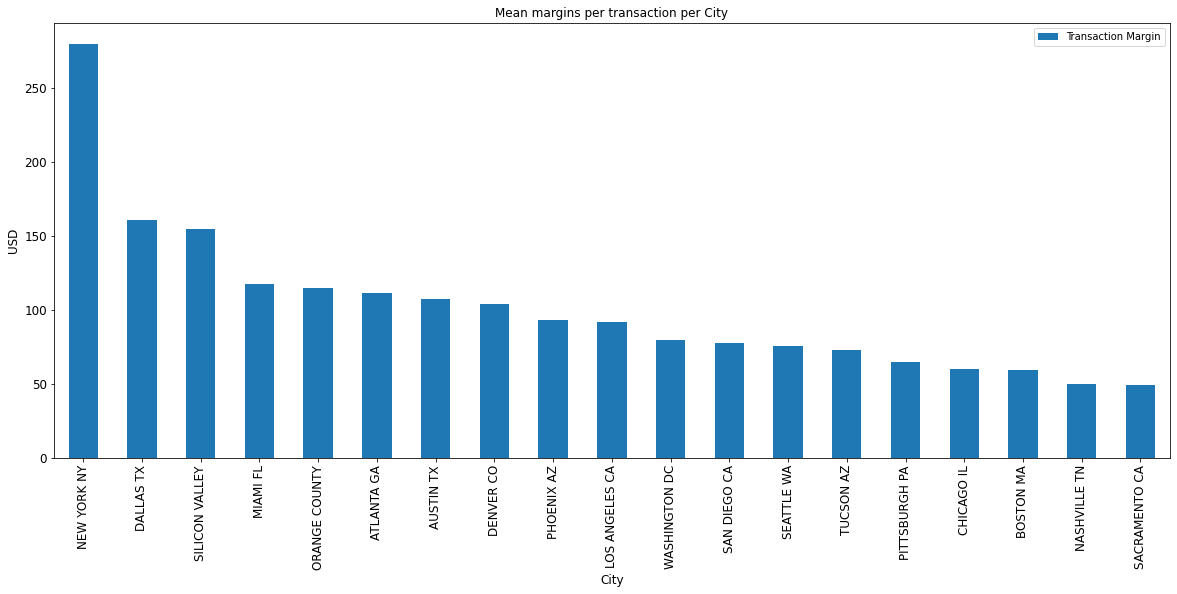

In [41]:
#Does the transaction margins vary depending of the cities?

citymeanmargindesc = citymeanmargin.sort_values('Transaction Margin',ascending=False)
ax = citymeanmargindesc[['Transaction Margin']].plot(kind='bar', title ="Mean margins per transaction per City", figsize=(20, 8), legend=True, fontsize=12)
ax.set_xlabel("City", fontsize=12)
ax.set_ylabel("USD", fontsize=12)
plt.show()

The information shows that the margins per transactions are larger in NY, Dallas, Sillicon Valley, Miami, Orange County, Atlanta, Austin, Denver, Phoenix and LA

**Hypothesis #3: The Yellow Cab performed more trips.**

In [42]:
#Which company has more transactions?
companycity = pd.crosstab(index=masterdata['City'],
            columns=masterdata['Company'], margins=True)

companycity

Company,Pink Cab,Yellow Cab,All
City,,,
ATLANTA GA,1762,5795,7557
AUSTIN TX,1868,3028,4896
BOSTON MA,5186,24506,29692
CHICAGO IL,9361,47264,56625
DALLAS TX,1380,5637,7017
DENVER CO,1394,2431,3825
LOS ANGELES CA,19865,28168,48033
MIAMI FL,2002,4452,6454
NASHVILLE TN,1841,1169,3010


The info shows that Yellow Cab performed more trips.

**Hypothesis #4: The Yellow Cab did more transactions in the cities where the margin per transaction is larger**

In [43]:
companycity = companycity.drop('All').drop(columns=['All'])


In [44]:
companycity['Mean Transaction Margin'] = citymeanmargin['Transaction Margin']
companycity.head()

Company,Pink Cab,Yellow Cab,Mean Transaction Margin
City,,,
ATLANTA GA,1762,5795,111.477158
AUSTIN TX,1868,3028,107.577824
BOSTON MA,5186,24506,59.568883
CHICAGO IL,9361,47264,59.820104
DALLAS TX,1380,5637,160.856957


In [45]:
companycitydesc= companycity.sort_values('Mean Transaction Margin',ascending=False)
companycitydesc.head()

Company,Pink Cab,Yellow Cab,Mean Transaction Margin
City,,,
NEW YORK NY,13967,85918,279.947491
DALLAS TX,1380,5637,160.856957
SILICON VALLEY,3797,4722,154.561013
MIAMI FL,2002,4452,117.493220
ORANGE COUNTY,1513,2469,114.766920


In [46]:
companycitydesc = companycitydesc.drop(columns=['Mean Transaction Margin'])
companycitydesc.head()

Company,Pink Cab,Yellow Cab
City,,
NEW YORK NY,13967,85918
DALLAS TX,1380,5637
SILICON VALLEY,3797,4722
MIAMI FL,2002,4452
ORANGE COUNTY,1513,2469


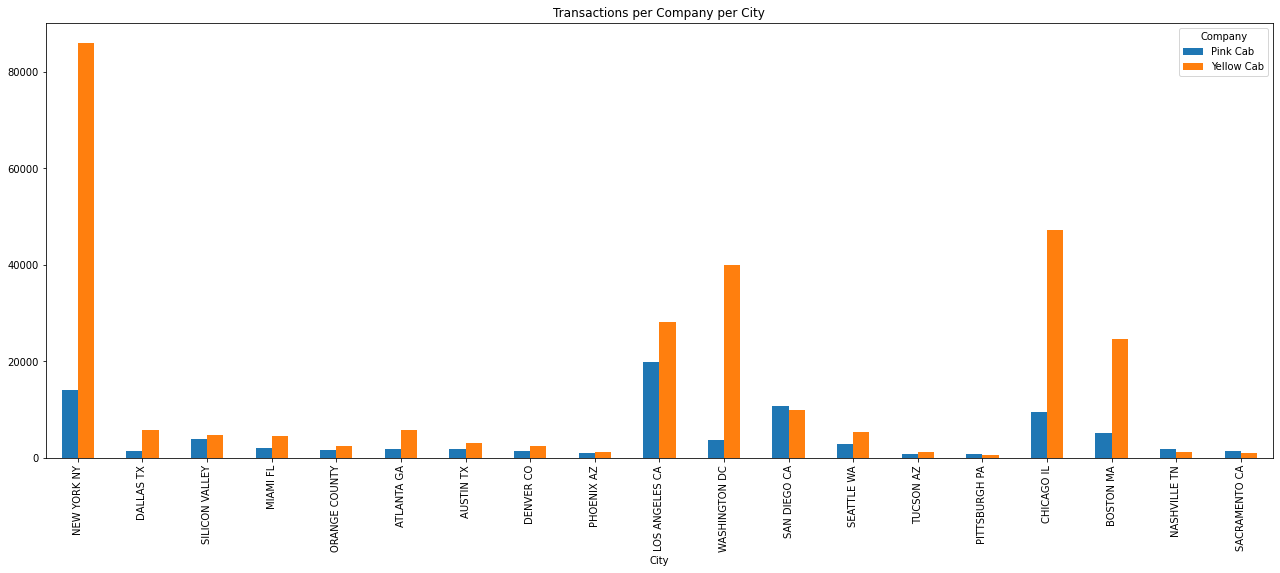

In [47]:
#Which company has more transactions in the cities where the margins are bigger?
ax = companycitydesc.plot.bar(title='Transactions per Company per City', rot=90,figsize=(22,8))

The info reveals that Yellow Cab performed more trips in almost all the cities (15 put of 19), and performed more trips in the cities where the margin per transaction is larger.

**Hypothesis #5: The seasonality impact on the margins of both companies is similar**

In [ ]:
masterdateasc= masterdata.sort_values('Converted_date',ascending=True)
masterdateasc.head()

,Transaction ID,Customer ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Converted_date,Gender,Age,Income (USD/Month),Transaction Margin
4144,10000600,3363,Cash,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,2016-01-04,Male,31,23320,194.9500
2473,10000171,20687,Cash,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,2016-01-04,Male,39,8926,122.0660
6913,10000640,4844,Cash,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016-01-04,Male,32,5548,164.9960
15948,10001242,14513,Card,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,2016-01-04,Male,62,3892,418.6236
3322,10000434,59961,Card,Yellow Cab,BOSTON MA,45.24,971.09,564.5952,2016-01-04,Male,61,12377,406.4948


In [ ]:
datecompmargin = masterdateasc.filter(items=['Company', 'Transaction Margin','Converted_date']).reset_index().drop(columns=['index'])
datecompmargin.head()

,Company,Transaction Margin,Converted_date
0,Yellow Cab,194.9500,2016-01-04
1,Pink Cab,122.0660,2016-01-04
2,Yellow Cab,164.9960,2016-01-04
3,Yellow Cab,418.6236,2016-01-04
4,Yellow Cab,406.4948,2016-01-04


In [ ]:
pinkdatemargin = datecompmargin[datecompmargin.Company.isin(['Pink Cab'])]
yellowdatemargin = datecompmargin[datecompmargin.Company.isin(['Yellow Cab'])]

In [ ]:
pinkdatemargin= pinkdatemargin.rename({'Transaction Margin': 'Pink Cab Transaction Margin'}, axis=1).reset_index().drop(columns= ['Company','index'])
yellowdatemargin= yellowdatemargin.rename({'Transaction Margin': 'Yellow Cab Transaction Margin', 'Converted_date':'Date of Trip'}, axis=1).reset_index().drop(columns= ['Company','index'])
yellowdatemargin.head()

,Yellow Cab Transaction Margin,Date of Trip
0,194.9500,2016-01-04
1,164.9960,2016-01-04
2,418.6236,2016-01-04
3,406.4948,2016-01-04
4,752.6900,2016-01-04


In [ ]:
yellowdatemargin= yellowdatemargin.set_index('Date of Trip')
pinkdatemargin= pinkdatemargin.set_index('Converted_date')
yellowdatemargin.head()

,Yellow Cab Transaction Margin
Date of Trip,
2016-01-04,194.9500
2016-01-04,164.9960
2016-01-04,418.6236
2016-01-04,406.4948
2016-01-04,752.6900


In [ ]:
pinkdatemargin= pinkdatemargin.groupby([pd.Grouper(freq="M")]).mean()
yellowdatemargin= yellowdatemargin.groupby([pd.Grouper(freq="M")]).mean()
yellowdatemargin.head()

,Yellow Cab Transaction Margin
Date of Trip,
2016-01-31,219.565214
2016-02-29,218.729362
2016-03-31,183.362133
2016-04-30,172.794497
2016-05-31,215.100473


In [ ]:
yellowdatemargin['Pink Cab Transaction Margin'] = pinkdatemargin['Pink Cab Transaction Margin']
companmargins = yellowdatemargin
companmargins.head()

,Yellow Cab Transaction Margin,Pink Cab Transaction Margin
Date of Trip,,
2016-01-31,219.565214,76.775958
2016-02-29,218.729362,84.108011
2016-03-31,183.362133,74.061395
2016-04-30,172.794497,66.823825
2016-05-31,215.100473,41.590275


Text(0, 0.5, 'USD')

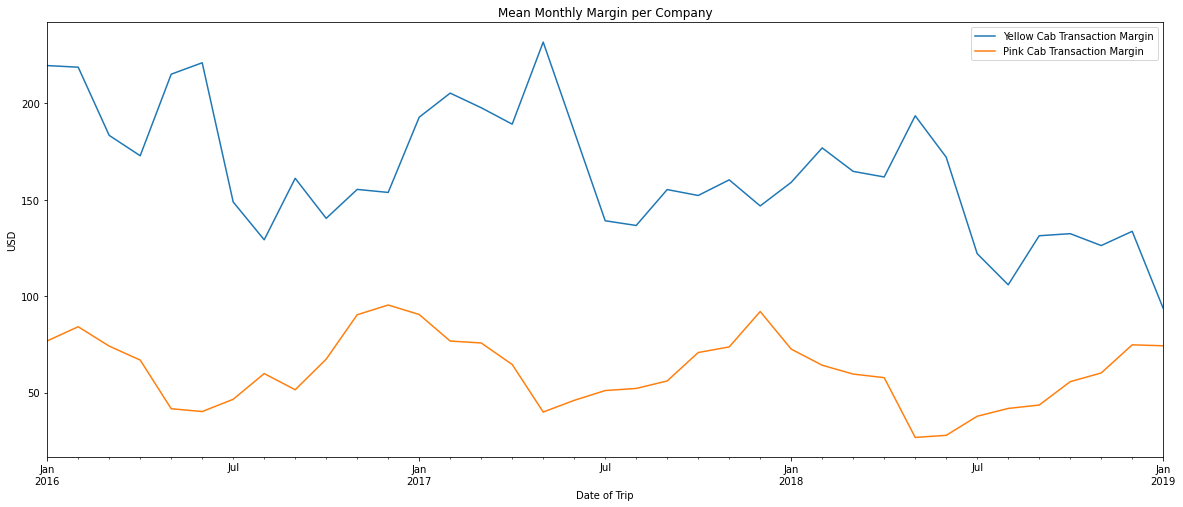

In [ ]:
#Has the mean monthly margin been behaving differently among the companies over time?
lines = companmargins.plot.line(figsize=(20,8))
plt.title("Mean Monthly Margin per Company")
plt.ylabel('USD')

**The Data shows that the monthly mean margins have behaved differently among the companies. When the Pink Cab monthly mean margins increase, so do the margins of Yellow Cab, but when Pink Cab monthly mean margins decrease, sometimes the margins of Yellow Cab actually tend to increase.**

## Conclusion

# **Conclusion is that the best company to invest is Yellow Cab.**

# Sección nueva